In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [2]:
import pandas as pd

red_wine = pd.read_csv('/Users/jainishah/Desktop/wine+quality/winequality-red.csv', delimiter=';')

white_wine = pd.read_csv('/Users/jainishah/Desktop/wine+quality/winequality-white.csv',  delimiter=';')

print(red_wine)
print(white_wine)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
# Running linear regression model on each feature in red df and white df 

import pandas as pd
import statsmodels.api as sm

def run_linear_regression(data, target="quality"): # function takes df and a target variable=quality
    features = data.columns.drop(target)  # excludes the target variable
    results = {} # dictionary to store regression results 
    
    for feature in features: # iterating over each feature in the dataset, individual regression
        X = sm.add_constant(data[[feature]]) # adding constatn term that represents the intercept in the regression model  
        y = data[target] # quality column
        model = sm.OLS(y, X).fit() # initializes an ordinary least squares regression, fits regression line to data 
        results[feature] = {
            "coef": model.params[feature], # slope 
            "p-value": model.pvalues[feature], # p-value indicating significance 
            "R-squared": model.rsquared # proportion of variance in y explained by x
        }
    
    return pd.DataFrame(results).T # results dict. converted to df 

# Run the linear regression for red and white wine datasets
red_results = run_linear_regression(red_wine)
white_results = run_linear_regression(white_wine)

print("Red Wine Linear Regression Results:\n", red_results)
print("\nWhite Wine Linear Regression Results:\n", white_results)

Red Wine Linear Regression Results:
                            coef       p-value  R-squared
fixed acidity          0.057539  6.495635e-07   0.015389
volatile acidity      -1.761438  2.051715e-59   0.152535
citric acid            0.938452  4.991295e-20   0.051245
residual sugar         0.007865  5.832180e-01   0.000189
chlorides             -2.211842  2.313383e-07   0.016617
free sulfur dioxide   -0.003911  4.283398e-02   0.002566
total sulfur dioxide  -0.004544  8.621703e-14   0.034262
density              -74.846014  1.874957e-12   0.030597
pH                    -0.301983  2.096278e-02   0.003333
sulphates              1.197712  1.802088e-24   0.063200
alcohol                0.360842  2.831477e-91   0.226734

White Wine Linear Regression Results:
                            coef        p-value  R-squared
fixed acidity         -0.119289   1.479886e-15   0.012919
volatile acidity      -1.710947   4.673261e-43   0.037917
citric acid           -0.067393   5.193459e-01   0.000085
residua

Interpretation: 

**Red Wine**

Most Influential:
Alcohol: Positive coefficient (0.360842) with the highest R-squared (0.2267), meaning higher alcohol content is strongly associated with better quality. This feature alone explains about 22.67% of the variance in quality scores.

Volatile Acidity: Negative coefficient (-1.761438) with a high R-squared (0.1525), indicating that higher volatile acidity is associated with lower quality. It explains 15.25% of the variance, suggesting it's a strong predictor of quality.

Other Significant:
Sulphates: Positive relationship with quality (coef = 1.197712, p-value very low), explaining about 6.32% of the variance.

Citric Acid: Positive influence (coef = 0.938452), although with a modest R-squared of 5.12%.

Density and Chlorides: Both have negative relationships with quality, though density explains more variance (3.06%).

Minor:
Features like fixed acidity, total sulfur dioxide, and pH show statistically significant coefficients, but they explain less variance (low R-squared values), indicating weaker relationships.

**White Wine**

Most Influential:
Alcohol: Positive coefficient (0.313469) and the highest R-squared (0.1897), similar to red wine, indicating a strong association between higher alcohol levels and higher quality.

Density: Strong negative relationship with quality (coef = -90.942400), explaining 9.43% of the variance. This feature is more important for white wine than red wine in relation to quality.

Other Notable:
Chlorides: Negative coefficient (-8.509991) with a low p-value, explaining about 4.41% of variance in quality.

Volatile Acidity: Negative association, though with a smaller R-squared than in red wine (3.79%).

Minimal:
Fixed Acidity, Residual Sugar, and pH have low R-squared values, indicating weaker relationships with quality for white wine.

Features like citric acid and free sulfur dioxide show almost no predictive power (extremely low R-squared values).

Summary of Key Differences
Alcohol consistently shows a positive influence on quality in both types of wine, making it the strongest predictor overall.

Volatile Acidity has a larger negative impact on red wine quality compared to white wine.

Density and Chlorides are more influential in white wine than in red wine, indicating some distinct chemical influences on quality between wine types.

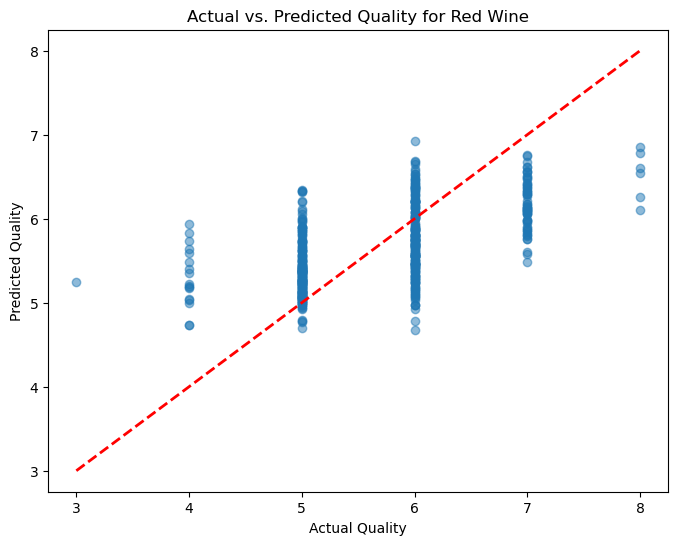

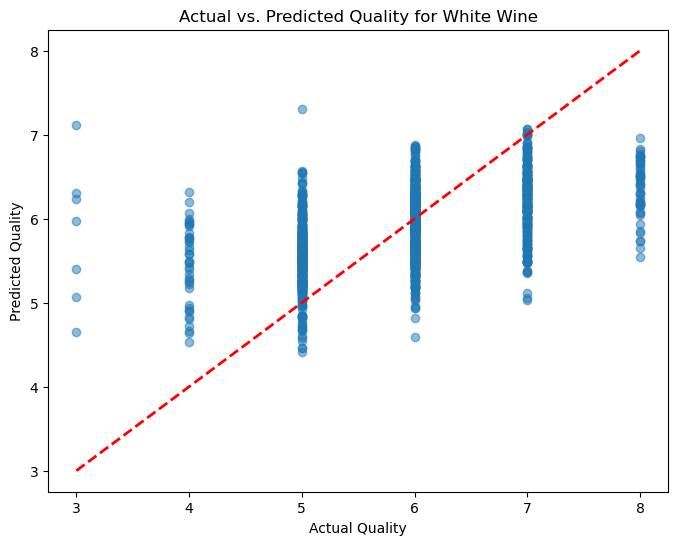

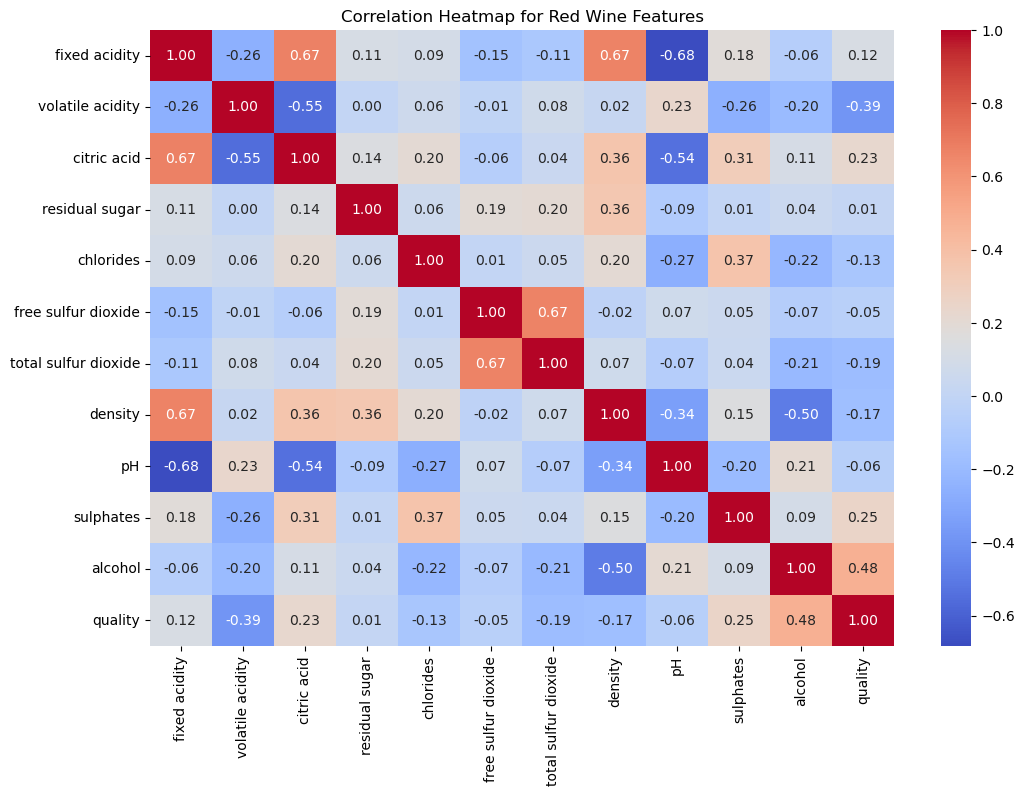

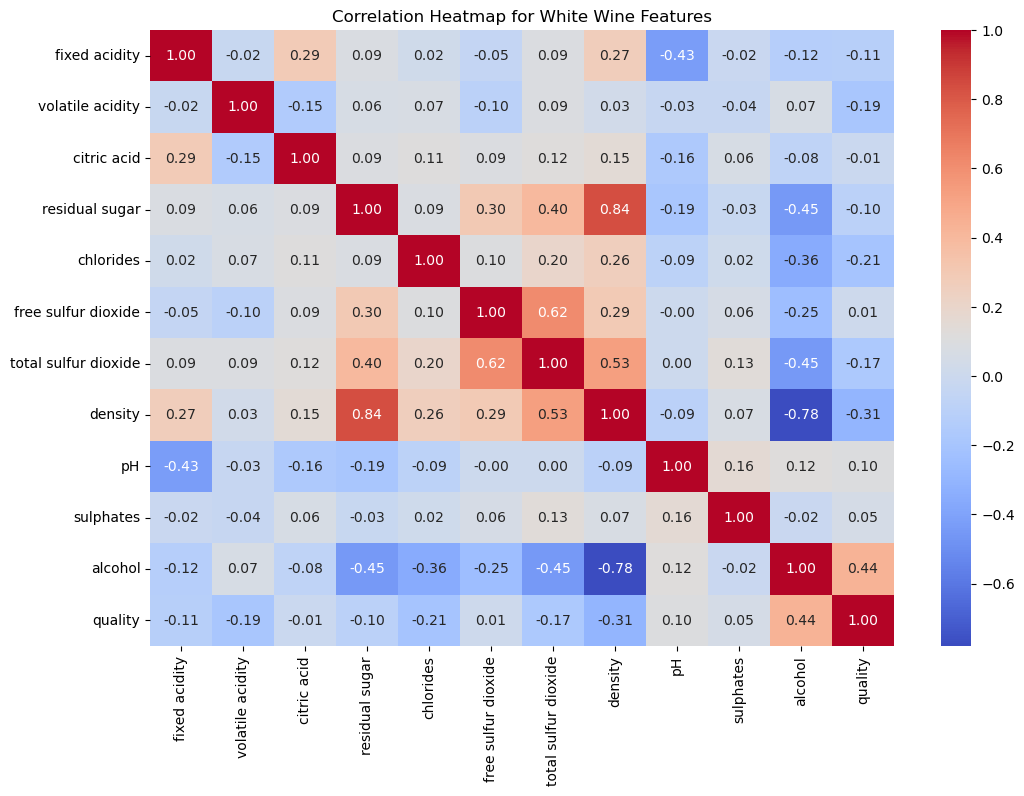

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Function to fit a linear regression model and plot actual vs. predicted values
def plot_actual_vs_predicted(data, wine_type):
    X = data.drop(columns="quality")  # Features we want to include
    y = data["quality"]               # Target variable is quality of wine

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fitting linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Plotting actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title(f"Actual vs. Predicted Quality for {wine_type} Wine")
    plt.show()

# Plotting actual vs. predicted for red wine
plot_actual_vs_predicted(red_wine, "Red")

# Plotting actual vs. predicted for white wine
plot_actual_vs_predicted(white_wine, "White")

# Function to create a correlation heatmap
def plot_correlation_heatmap(data, wine_type):
    plt.figure(figsize=(12, 8))
    plt.title(f"Correlation Heatmap for {wine_type} Wine Features")
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.show()

# Correlation heatmap for red wine
plot_correlation_heatmap(red_wine, "Red")

# Correlation heatmap for white wine
plot_correlation_heatmap(white_wine, "White")


Mean Squared Error: 0.7284615384615385


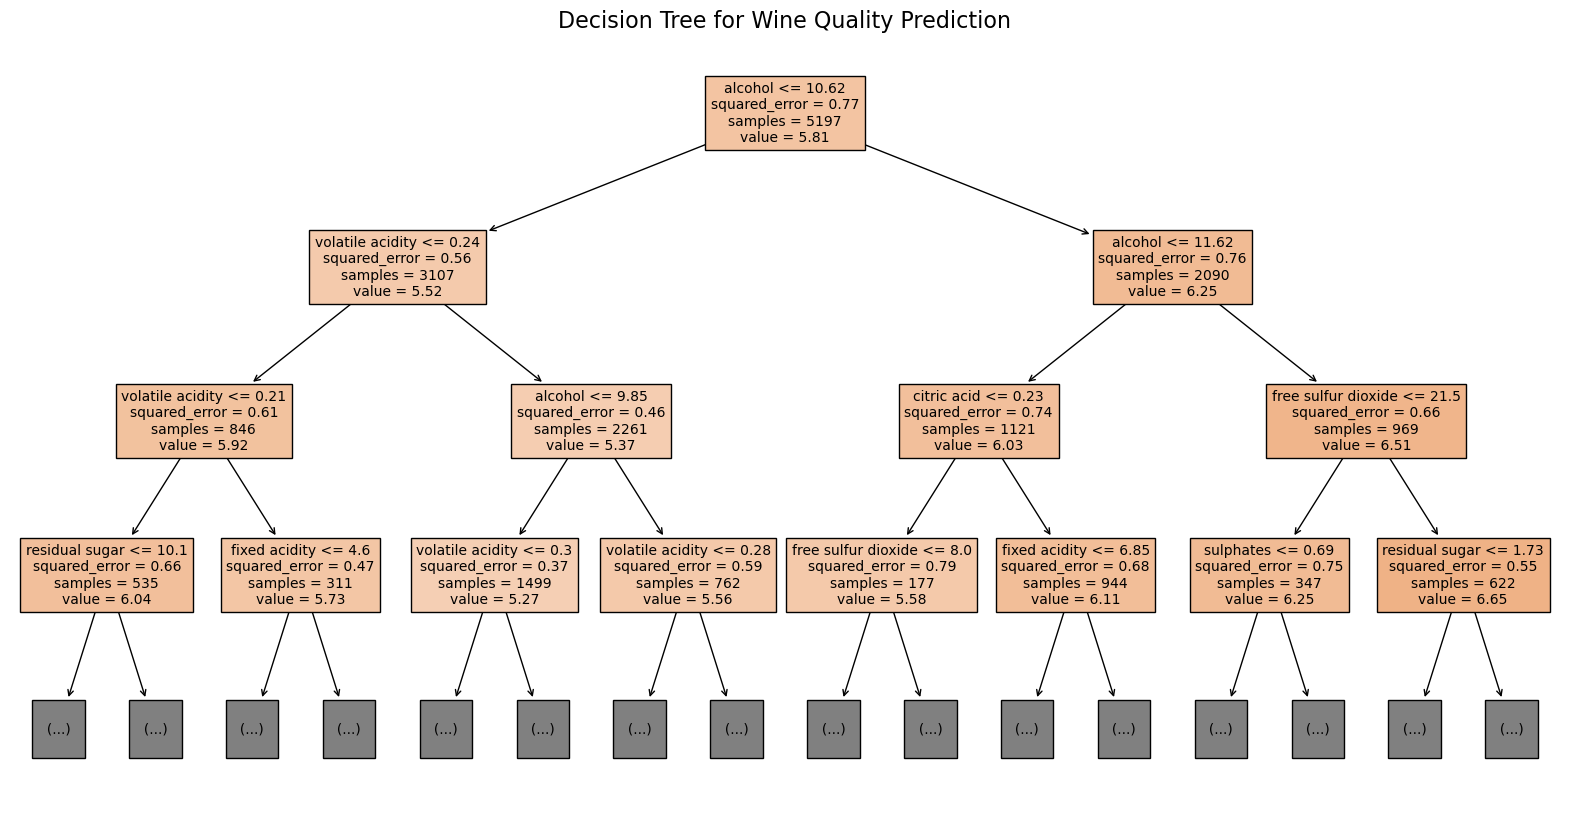

/var/folders/xk/r4s34z5d1m32wzh85shj3ljm0000gn/T/ipykernel_1477/3956139238.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.sort_values(), y=feature_importances.sort_values().index, palette=wine_colors)
/var/folders/xk/r4s34z5d1m32wzh85shj3ljm0000gn/T/ipykernel_1477/3956139238.py:48: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature_importances.sort_values(), y=feature_importances.sort_values().index, palette=wine_colors)


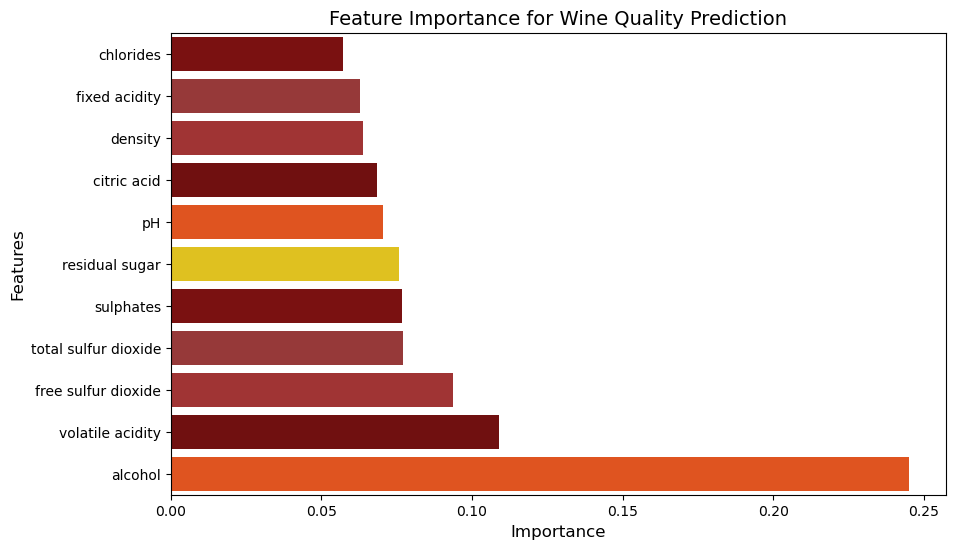

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# combining datasets and adding a "type" column
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine_data = pd.concat([red_wine, white_wine]) # merging red and wine datasets

# defining features (X) and target variable (y)
X = wine_data.drop(['quality', 'type'], axis=1)  
y = wine_data['quality'] # target variable

# splitting data into training and testing set 
# 20% of data assigned to test set  and ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# training model on training data
tree_regressor.fit(X_train, y_train)

# using trained model to predict quality values for test set
y_pred = tree_regressor.predict(X_test)

# calculating Mean Squared Error between predicted and actual values 
# lower MSE means better predictive accuracy 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# plotting the decision tree
# showing structure of decision tree with key splitting points, we can see which features influence quality 
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, max_depth=3, fontsize=10, precision=2)
plt.title("Decision Tree for Wine Quality Prediction", fontsize=16)
plt.show()

# getting feature importance scores which indiciate how influential each feature is in predicting wine quality
feature_importances = pd.Series(tree_regressor.feature_importances_, index=X.columns)

wine_colors = ["#8B0000", "#A52A2A", "#B22222", "#800000", "#FF4500", "#FFD700"] 

# plotting feature importances 
# showing which features are most significant in predicting wine quality 
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(), y=feature_importances.sort_values().index, palette=wine_colors)
plt.title("Feature Importance for Wine Quality Prediction", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()





In [8]:
from sklearn.tree import export_graphviz
import graphviz

print(graphviz.__version__)


# Export the decision tree to DOT format with custom parameters
dot_data =export_graphviz(
    tree_regressor, 
    out_file=None, 
    feature_names=X.columns,
    filled=True, 
    rounded=True, 
    special_characters=True,
    impurity=False
)

# Customize color scheme by modifying the .dot file in Graphviz
# Setting node colors based on quality prediction (wine theme)
graph = graphviz.Source(dot_data)
graph.format = "png"  # Save output as a PNG

# Visualize and render the decision tree with a wine-themed color palette
graph.render("wine_quality_tree", view=True)


ModuleNotFoundError: No module named 'graphviz'